# FDA_hw1

In [238]:
import numpy as np
import scipy as sp 
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

['Reviews.csv', 'FDA_hw1.ipynb', 'README.md', 'Pokemon.csv', '.ipynb_checkpoints', '.git', 'kernel.ipynb']


## Part 1

### 1. Top-10 Reviewer

In [239]:
# The data path of input file
data_path = "Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)
pd_data = pd_data[:10000]
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [240]:
s1 = pd_data["UserId"].value_counts()
s1.head(10)

A1Z54EM24Y40LL    17
A2SZLNSI5KOQJT    10
A35R32TA60XD57     9
A281NPSIMI1C2R     8
A3NHUQ33CFH3VM     7
A3OXHLG6DIBRW8     7
A3PJZ8TU8FDQ1K     7
AQQLWCMRNDFGI      6
AY12DBB0U420B      6
A2R6RA8FRBS608     6
Name: UserId, dtype: int64

In [241]:
counts = pd.Series(s1, name='Score count')
counts.head(10)

A1Z54EM24Y40LL    17
A2SZLNSI5KOQJT    10
A35R32TA60XD57     9
A281NPSIMI1C2R     8
A3NHUQ33CFH3VM     7
A3OXHLG6DIBRW8     7
A3PJZ8TU8FDQ1K     7
AQQLWCMRNDFGI      6
AY12DBB0U420B      6
A2R6RA8FRBS608     6
Name: Score count, dtype: int64

In [242]:
df1 = pd_data.drop(columns=['Id', 'ProductId', 'HelpfulnessNumerator', 
                            'HelpfulnessDenominator', 'Time', 'Summary', 'Text'])
df1.insert(2, column='Score count', value=1)
df1.head(10)

,UserId,ProfileName,Score count,Score
0,A3SGXH7AUHU8GW,delmartian,1,5
1,A1D87F6ZCVE5NK,dll pa,1,1
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4
3,A395BORC6FGVXV,Karl,1,2
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",1,5
5,ADT0SRK1MGOEU,Twoapennything,1,4
6,A1SP2KVKFXXRU1,David C. Sullivan,1,5
7,A3JRGQVEQN31IQ,Pamela G. Williams,1,5
8,A1MZYO9TZK0BBI,R. James,1,5
9,A21BT40VZCCYT4,Carol A. Reed,1,5


In [243]:
df1_t1 = df1.set_index('UserId')
df1_t1.head(10)

,ProfileName,Score count,Score
UserId,,,
A3SGXH7AUHU8GW,delmartian,1,5
A1D87F6ZCVE5NK,dll pa,1,1
ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4
A395BORC6FGVXV,Karl,1,2
A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",1,5
ADT0SRK1MGOEU,Twoapennything,1,4
A1SP2KVKFXXRU1,David C. Sullivan,1,5
A3JRGQVEQN31IQ,Pamela G. Williams,1,5
A1MZYO9TZK0BBI,R. James,1,5


In [244]:
#df1_group87 = pd.concat([df1_t1, counts], axis=1, sort=False)

In [245]:
#df1_t2 = df1.set_index(['UserId', 'ProfileName'])
#df1_t2.head(10)

In [246]:
ProfileName_series = pd.Series(df1_t1['ProfileName'], name='ProfileName')
ProfileName_series.head(10)

UserId
A3SGXH7AUHU8GW                         delmartian
A1D87F6ZCVE5NK                             dll pa
ABXLMWJIXXAIN     Natalia Corres "Natalia Corres"
A395BORC6FGVXV                               Karl
A1UQRSCLF8GW1T      Michael D. Bigham "M. Wassir"
ADT0SRK1MGOEU                      Twoapennything
A1SP2KVKFXXRU1                  David C. Sullivan
A3JRGQVEQN31IQ                 Pamela G. Williams
A1MZYO9TZK0BBI                           R. James
A21BT40VZCCYT4                      Carol A. Reed
Name: ProfileName, dtype: object

#### groupby

In [247]:
df1_group = df1.groupby('UserId').sum()
df1_group.head(10)

,Score count,Score
UserId,,
A10012K7DF3SBQ,1,3
A1001TYW5FZYD9,1,5
A1008DPSP6KC9J,1,5
A101C99CG8EFUH,1,3
A102XKYZE9Q9L4,1,5
A10317LUD1C1VJ,1,4
A10389F7LRIZWQ,1,2
A103EZCS9H8WW1,1,5
A103U3KR4L2ZXT,1,5


In [248]:
df1_group['UserId'] = df1_group.index
df1_group.head(10)

,Score count,Score,UserId
UserId,,,
A10012K7DF3SBQ,1,3,A10012K7DF3SBQ
A1001TYW5FZYD9,1,5,A1001TYW5FZYD9
A1008DPSP6KC9J,1,5,A1008DPSP6KC9J
A101C99CG8EFUH,1,3,A101C99CG8EFUH
A102XKYZE9Q9L4,1,5,A102XKYZE9Q9L4
A10317LUD1C1VJ,1,4,A10317LUD1C1VJ
A10389F7LRIZWQ,1,2,A10389F7LRIZWQ
A103EZCS9H8WW1,1,5,A103EZCS9H8WW1
A103U3KR4L2ZXT,1,5,A103U3KR4L2ZXT


In [249]:
#X = df1_group.index
#Y = list(X)
#Y
#UserId_index_series = pd.Series(Y)
#UserId_index_series.head(10)

In [250]:
#Id = df1_group['Id']
#UserId_series = pd.DataFrame(Y, index=Id, columns=['UserId'])
#UserId_series.head(10)

In [251]:
#gg = df1_group['ProfileName']
#gg.reset_index(drop=True, inplace=True)
#ProfileName_series = pd.Series(data=gg, index=Id)
#ProfileName_series.head(10)

In [252]:
#gg = df1_group['Score count']
#gg.reset_index(drop=True, inplace=True)
#Score_count_series = pd.Series(data=gg, index=Id)
#Score_count_series.head(100)

In [253]:
#df1_sum = pd.concat([df1_group_id_index, UserId_series], axis=1)
#df1_group4 = pd.concat([df1_group3, ProfileName_series], axis=1)
#df1_sum = pd.concat([df1_sum, gg_series], axis=1)

#df1_group4.head(10)

In [254]:
#stmp = pd.Series(['fuck', 'you', '!!!'], index = ['A3SGXH7AUHU8GW', 'A102XKYZE9Q9L4', 'nonono'])
#stmp

In [255]:
ProfileName_series.drop_duplicates(inplace=True)

In [256]:
#df1_group2 = pd.concat([df1_group, stmp], axis=1, sort=False)
df1_group2 = pd.concat([df1_group, ProfileName_series], axis=1, sort=False)
df1_group2.head(10)

,Score count,Score,UserId,ProfileName
A10012K7DF3SBQ,1,3,A10012K7DF3SBQ,Terri Yang
A1001TYW5FZYD9,1,5,A1001TYW5FZYD9,"Anne Thompson ""dreamsinger41"""
A1008DPSP6KC9J,1,5,A1008DPSP6KC9J,Lee F
A101C99CG8EFUH,1,3,A101C99CG8EFUH,Benjamin McGough
A102XKYZE9Q9L4,1,5,A102XKYZE9Q9L4,"TjB ""cancer-free!"""
A10317LUD1C1VJ,1,4,A10317LUD1C1VJ,CSN
A10389F7LRIZWQ,1,2,A10389F7LRIZWQ,Joseph G Erba
A103EZCS9H8WW1,1,5,A103EZCS9H8WW1,Shirena Nicole Gonzalez
A103U3KR4L2ZXT,1,5,A103U3KR4L2ZXT,"AndreaR ""andiemack"""
A104Y49ZQ4CYJ2,1,5,A104Y49ZQ4CYJ2,"H. Adams ""hollya"""


In [257]:
df1_group3 = df1_group2.sort_values(by='Score count', ascending=False)
df1_group3.head(10)

,Score count,Score,UserId,ProfileName
A1Z54EM24Y40LL,17,66,A1Z54EM24Y40LL,c2
A2SZLNSI5KOQJT,10,38,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;"""
A35R32TA60XD57,9,37,A35R32TA60XD57,M. Torma
A281NPSIMI1C2R,8,40,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review"""
A3OXHLG6DIBRW8,7,31,A3OXHLG6DIBRW8,"C. F. Hill ""CFH"""
A3NHUQ33CFH3VM,7,22,A3NHUQ33CFH3VM,Citizen John
A3PJZ8TU8FDQ1K,7,33,A3PJZ8TU8FDQ1K,Jared Castle
AQ6SHOW0VMZGF,6,16,AQ6SHOW0VMZGF,"K. Padgett ""familyof5"""
A26NFIQ7KWI8Y7,6,16,A26NFIQ7KWI8Y7,kt rose
A10H24TDLK2VDP,6,18,A10H24TDLK2VDP,William Jens Jensen


In [258]:
df1_group4 = df1_group3.set_index(['UserId', 'ProfileName'])
df1_group4.head(10)

,,Score count,Score
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,66
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,38
A35R32TA60XD57,M. Torma,9,37
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,40
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,31
A3NHUQ33CFH3VM,Citizen John,7,22
A3PJZ8TU8FDQ1K,Jared Castle,7,33
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,16
A26NFIQ7KWI8Y7,kt rose,6,16


In [259]:
df1_group4['Score mean'] = df1_group4['Score']/df1_group4['Score count']
df1_group4.head(10)

,,Score count,Score,Score mean
UserId,ProfileName,,,
A1Z54EM24Y40LL,c2,17,66,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,38,3.800000
A35R32TA60XD57,M. Torma,9,37,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,40,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,31,4.428571
A3NHUQ33CFH3VM,Citizen John,7,22,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,33,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,16,2.666667
A26NFIQ7KWI8Y7,kt rose,6,16,2.666667


In [260]:
df1_group5 = df1_group4.drop(columns=['Score'])
df1_group5.head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


In [261]:
#ProfileName_series = df1['ProfileName']
#df1_sum = pd.concat([df1_sum, df1['ProfileName']], axis=1)
#result = df1_sum.append(df1['ProfileName'])

#df1_sum.reset_index(drop=True, inplace=True)
#ProfileName_series.reset_index(drop=True, inplace=True)

#df1_sum = pd.concat([df1_sum, ProfileName_series], axis=1)
#df1_sum.head(10)
#ProfileName_series.head(10)


In [262]:
#df1_sum = df1_sum.sort_values(by='Score count', ascending=False)
#df1_sum.head(10)

### 2. Plot score distribution for the user with the most number of reviews

In [263]:
df2 = pd_data.drop(columns=['Id', 'ProductId', 'HelpfulnessNumerator', 
                            'HelpfulnessDenominator', 'Time', 'Summary', 'Text'])
df2.head(10)

,UserId,ProfileName,Score
0,A3SGXH7AUHU8GW,delmartian,5
1,A1D87F6ZCVE5NK,dll pa,1
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4
3,A395BORC6FGVXV,Karl,2
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5
5,ADT0SRK1MGOEU,Twoapennything,4
6,A1SP2KVKFXXRU1,David C. Sullivan,5
7,A3JRGQVEQN31IQ,Pamela G. Williams,5
8,A1MZYO9TZK0BBI,R. James,5
9,A21BT40VZCCYT4,Carol A. Reed,5


In [264]:
df2_t1 = df2.loc[pd_data['UserId'] == 'A1Z54EM24Y40LL']
df2_t1

,UserId,ProfileName,Score
143,A1Z54EM24Y40LL,c2,5
3587,A1Z54EM24Y40LL,c2,5
4993,A1Z54EM24Y40LL,c2,5
6371,A1Z54EM24Y40LL,c2,3
6372,A1Z54EM24Y40LL,c2,4
6373,A1Z54EM24Y40LL,c2,4
6374,A1Z54EM24Y40LL,c2,5
6375,A1Z54EM24Y40LL,c2,2
6380,A1Z54EM24Y40LL,c2,5
6382,A1Z54EM24Y40LL,c2,3


In [265]:
s2 = df2_t1['Score'].value_counts()
s2

5    7
4    4
3    4
2    1
1    1
Name: Score, dtype: int64

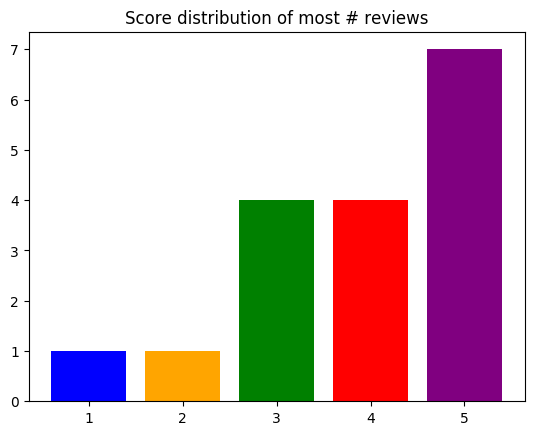

In [266]:
plt.bar(s2.index, s2.values, color=['purple', 'red', 'green', 'orange', 'blue'])
plt.title('Score distribution of most # reviews')
plt.show()

### 3. Plot pandas Series DataFrame (Time->Date)

In [267]:
df3 = pd_data.drop(columns=['Id', 'ProductId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Summary', 'Text'])
df3.head(10)

,UserId,ProfileName,Score,Time
0,A3SGXH7AUHU8GW,delmartian,5,1303862400
1,A1D87F6ZCVE5NK,dll pa,1,1346976000
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,1219017600
3,A395BORC6FGVXV,Karl,2,1307923200
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,1350777600
5,ADT0SRK1MGOEU,Twoapennything,4,1342051200
6,A1SP2KVKFXXRU1,David C. Sullivan,5,1340150400
7,A3JRGQVEQN31IQ,Pamela G. Williams,5,1336003200
8,A1MZYO9TZK0BBI,R. James,5,1322006400
9,A21BT40VZCCYT4,Carol A. Reed,5,1351209600


In [268]:
import time
df3['Year'] = df3['Time'].apply(lambda x: time.gmtime(x).tm_year)
df3.head(10)

,UserId,ProfileName,Score,Time,Year
0,A3SGXH7AUHU8GW,delmartian,5,1303862400,2011
1,A1D87F6ZCVE5NK,dll pa,1,1346976000,2012
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,1219017600,2008
3,A395BORC6FGVXV,Karl,2,1307923200,2011
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,1350777600,2012
5,ADT0SRK1MGOEU,Twoapennything,4,1342051200,2012
6,A1SP2KVKFXXRU1,David C. Sullivan,5,1340150400,2012
7,A3JRGQVEQN31IQ,Pamela G. Williams,5,1336003200,2012
8,A1MZYO9TZK0BBI,R. James,5,1322006400,2011
9,A21BT40VZCCYT4,Carol A. Reed,5,1351209600,2012


In [269]:
s3 = df3['Year'].value_counts()
s3

2012    3246
2011    2890
2010    1621
2009    1193
2008     508
2007     370
2006     122
2005      28
2004      20
2000       2
Name: Year, dtype: int64

Text(0.5, 1.0, 'Review count by year')

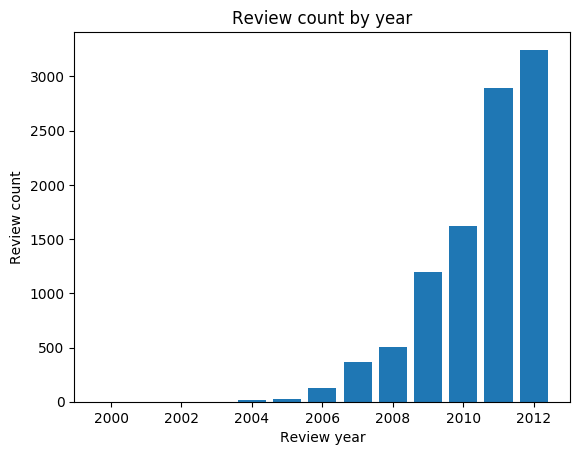

In [270]:
plt.bar(s3.index, s3.values)
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title('Review count by year')

### 4. Plot HeatMap using seaborn

In [271]:
#sns.heatmap(data=pd_data)

In [272]:
df4 = pd_data.drop(columns=['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text'])
df4.head(10)

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
0,1,1,1,5,1303862400
1,2,0,0,1,1346976000
2,3,1,1,4,1219017600
3,4,3,3,2,1307923200
4,5,0,0,5,1350777600
5,6,0,0,4,1342051200
6,7,0,0,5,1340150400
7,8,0,0,5,1336003200
8,9,1,1,5,1322006400
9,10,0,0,5,1351209600


In [273]:
corr = df4.corr()
corr

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,0.013141,0.010480,-0.022696,0.030299
HelpfulnessNumerator,0.013141,1.000000,0.969580,-0.024280,-0.178248
HelpfulnessDenominator,0.010480,0.969580,1.000000,-0.102559,-0.197157
Score,-0.022696,-0.024280,-0.102559,1.000000,-0.034358
Time,0.030299,-0.178248,-0.197157,-0.034358,1.000000


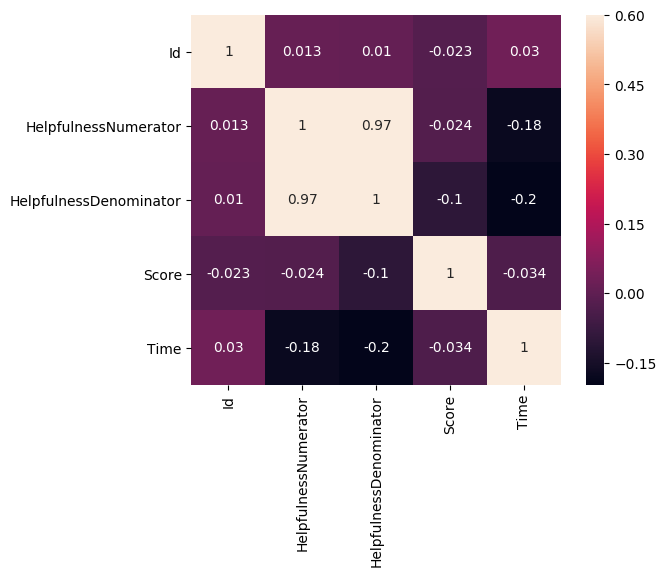

In [274]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmax=0.6,
            square=True,
            annot=True)

### 5. Helpful percent

In [275]:
# filter out cases with numerator > denominator
df5 = pd_data.loc[pd_data['HelpfulnessNumerator'] <= pd_data['HelpfulnessDenominator']]
df5.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [276]:
def f(x):
    if (x[0]==0)&(x[1]==0):
        return -1
    return x[0]/x[1]


df5['Helpful percent'] = df5[['HelpfulnessNumerator', 'HelpfulnessDenominator']].apply(f, axis=1)
df5.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful percent
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,-1.0
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,-1.0
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,-1.0
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,-1.0


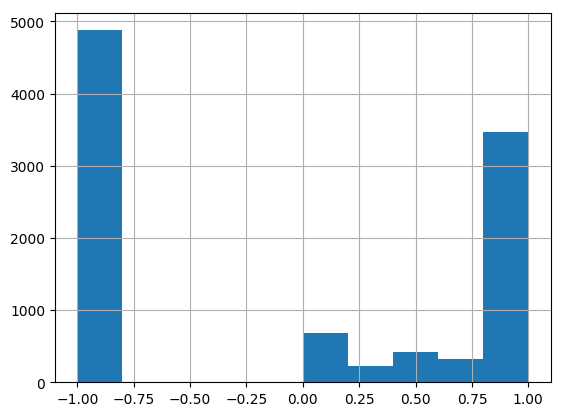

In [277]:
df5['Helpful percent'].hist()

## Part 2

Try another dataset in kaggle (apply numpy. pandas. matplotlib or nltk...)

https://www.kaggle.com/abcsds/pokemon

In [278]:
data_path2 = "Pokemon.csv"
dfp2 = pd.read_csv(data_path2)
dfp2.head(160)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### 1. Types Overview

In [279]:
stype1 = dfp2['Type 1'].value_counts()

In [280]:
stype2 = dfp2['Type 2'].value_counts()

In [281]:
stype = stype1 + stype2
stype

Bug          72
Dark         51
Dragon       50
Electric     50
Fairy        40
Fighting     53
Fire         64
Flying      101
Ghost        46
Grass        95
Ground       67
Ice          38
Normal      102
Poison       62
Psychic      90
Rock         58
Steel        49
Water       126
dtype: int64

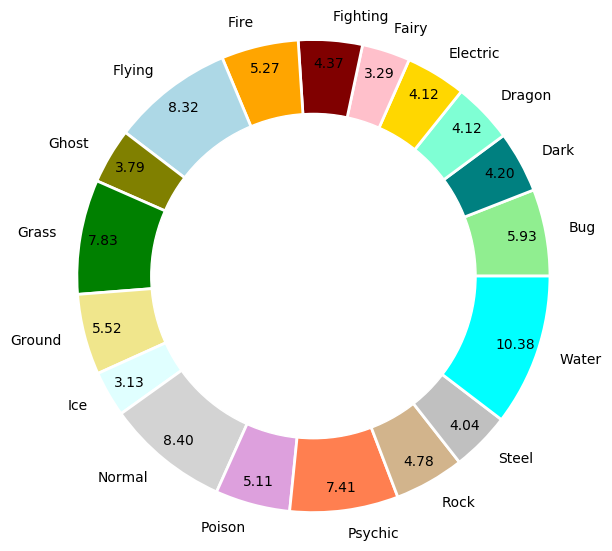

In [282]:
plt.style.use('default')
my_circle = plt.Circle((0,0), radius=1.1, color='white')
plt.pie(stype.values, labels=stype.index, autopct='%.2f', pctdistance=0.9,
        colors=['lightgreen', 'teal', 'aquamarine', 'gold',
                'pink', 'maroon', 'orange', 'lightblue', 'olive', 
                'green', 'khaki', 'lightcyan', 'lightgray',
                'plum', 'coral', 'tan', 'silver', 'cyan'],
        labeldistance=1.1, radius=1.6,
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [283]:
def ftype(x):
    if x[1] == x[1] and x[0] == x[0]:
        return x[0] + x[1]
    if x[1] == x[1]:        # check if it is NaN
        return x[1]
    if x[0] == x[0]:
        return x[0]
    return 0

#dfp2['Type'] = dfp2[['Type 1', 'Type 2']].apply(ftype, axis=1)
#dfp2.head(10)

In [284]:
#sp2 = dfp2['Type'].value_counts()
#sp2_t1 = sp2.head(10)

In [285]:
#sns.barplot(sp2_t1.index, sp2_t1.values, saturation=100)
#plt.xlabel('Review year')
#plt.ylabel('Review count')
#plt.title('Review count by year')

### 2. Mean values for each generation

In [286]:
df_g1 = dfp2.loc[dfp2['Generation'] == 1]
df_g2 = dfp2.loc[dfp2['Generation'] == 2]
df_g3 = dfp2.loc[dfp2['Generation'] == 3]
df_g4 = dfp2.loc[dfp2['Generation'] == 4]
df_g5 = dfp2.loc[dfp2['Generation'] == 5]
df_g6 = dfp2.loc[dfp2['Generation'] == 6]

In [287]:
#s_g11 = df_g1['Type 1'].value_counts()
#s_g12 = df_g1['Type 2'].value_counts()
#dfc_g1 = pd.concat([s_g11, s_g12], axis=1, sort=False)
#dfc_g1['Type'] = dfc_g1[['Type 1', 'Type 2']].apply(ftype, axis=1)
#sss = dfc_g1.loc[dfc_g1['Type'] == 'Water']
#dfct_g1 = dfc_g1.sort_values(by='Type', ascending=False)
#s_g1 = dfc_g1['Type'].head(3)


#s_g21 = df_g2['Type 1'].value_counts()
#s_g22 = df_g2['Type 2'].value_counts()
#dfc_g2 = pd.concat([s_g21, s_g22], axis=1, sort=False)
#dfc_g2['Type'] = dfc_g2[['Type 1', 'Type 2']].apply(ftype, axis=1)
#dfct_g2 = dfc_g2.sort_values(by='Type', ascending=False)
#s_g2 = dfc_g2['Type'].head(3)

#s_g31 = df_g3['Type 1'].value_counts()
#s_g32 = df_g3['Type 2'].value_counts()
#dfc_g3 = pd.concat([s_g31, s_g32], axis=1, sort=False)
#dfc_g3['Type'] = dfc_g3[['Type 1', 'Type 2']].apply(ftype, axis=1)

#s_g41 = df_g4['Type 1'].value_counts()
#s_g42 = df_g4['Type 2'].value_counts()
#dfc_g4 = pd.concat([s_g41, s_g42], axis=1, sort=False)
#dfc_g4['Type'] = dfc_g4[['Type 1', 'Type 2']].apply(ftype, axis=1)

#s_g51 = df_g5['Type 1'].value_counts()
#s_g52 = df_g5['Type 2'].value_counts()
#dfc_g5 = pd.concat([s_g51, s_g52], axis=1, sort=False)
#dfc_g5['Type'] = dfc_g5[['Type 1', 'Type 2']].apply(ftype, axis=1)

#s_g61 = df_g6['Type 1'].value_counts()
#s_g62 = df_g6['Type 2'].value_counts()
#dfc_g6 = pd.concat([s_g61, s_g62], axis=1, sort=False)
#dfc_g6['Type'] = dfc_g6[['Type 1', 'Type 2']].apply(ftype, axis=1)

#l1 = dfc_g1['Type'][['Water', 'Normal', 'Flying']]
#type(l1)

In [288]:
listhp, listat, listde = [], [], []

sg1 = df_g1[['HP', 'Attack', 'Defense']].mean(axis=0)
listhp.append(sg1.iloc[0])
listat.append(sg1.iloc[1])
listde.append(sg1.iloc[2])

sg2 = df_g2[['HP', 'Attack', 'Defense']].mean(axis=0)
listhp.append(sg2.iloc[0])
listat.append(sg2.iloc[1])
listde.append(sg2.iloc[2])

sg3 = df_g3[['HP', 'Attack', 'Defense']].mean(axis=0)
listhp.append(sg3.iloc[0])
listat.append(sg3.iloc[1])
listde.append(sg3.iloc[2])

sg4 = df_g4[['HP', 'Attack', 'Defense']].mean(axis=0)
listhp.append(sg4.iloc[0])
listat.append(sg4.iloc[1])
listde.append(sg4.iloc[2])

sg5 = df_g5[['HP', 'Attack', 'Defense']].mean(axis=0)
listhp.append(sg5.iloc[0])
listat.append(sg5.iloc[1])
listde.append(sg5.iloc[2])

sg6 = df_g6[['HP', 'Attack', 'Defense']].mean(axis=0)
listhp.append(sg6.iloc[0])
listat.append(sg6.iloc[1])
listde.append(sg6.iloc[2])

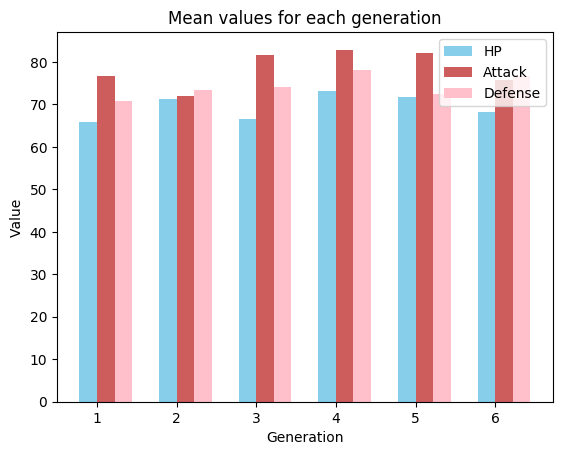

In [289]:
ind = np.arange(6)  # the x locations for the groups
width = 0.22        # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(ind - width/2, listhp, width,
                color='SkyBlue', label='HP')
rects1 = ax.bar(ind + width/2, listat, width,
                color='IndianRed', label='Attack')
rects2 = ax.bar(ind + 1.5*width, listde, width,
                color='pink', label='Defense')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Generation')
ax.set_ylabel('Value')
ax.set_title('Mean values for each generation')
ax.set_xticks(ind)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6'))
ax.legend()


### 3.

In [290]:
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')